# Computational finance on stocks

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
# S&P 500
start_date = '2005-01-01'
end_date = '2023-04-01'
ticker = 'SPY'

In [6]:
df = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,84.258591,55748000
2005-01-04,120.459999,120.540001,118.440002,118.830002,83.228981,69167600
2005-01-05,118.739998,119.250000,118.000000,118.010002,82.654648,65667300
2005-01-06,118.440002,119.150002,118.260002,118.610001,83.074875,47814700
2005-01-07,118.970001,119.230003,118.129997,118.440002,82.955856,55847700


In [8]:
df.index = df.index.date
df.head()

,Open,High,Low,Close,Adj Close,Volume
2005-01-03,121.559998,121.760002,119.900002,120.300003,84.258591,55748000
2005-01-04,120.459999,120.540001,118.440002,118.830002,83.228981,69167600
2005-01-05,118.739998,119.250000,118.000000,118.010002,82.654648,65667300
2005-01-06,118.440002,119.150002,118.260002,118.610001,83.074875,47814700
2005-01-07,118.970001,119.230003,118.129997,118.440002,82.955856,55847700


## Daily Returns

In [9]:
df["R"] = df["Adj Close"].pct_change()
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,R
2005-01-03,121.559998,121.760002,119.900002,120.300003,84.258591,55748000,NaN
2005-01-04,120.459999,120.540001,118.440002,118.830002,83.228981,69167600,-0.012220
2005-01-05,118.739998,119.250000,118.000000,118.010002,82.654648,65667300,-0.006901


Text(0.5, 1.0, 'Daily Returns distribution')

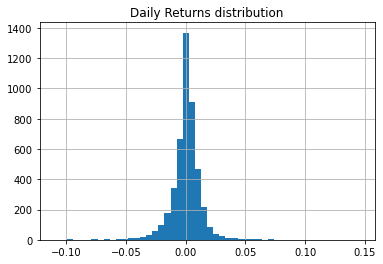

In [10]:
ax = df.R.hist(bins=50)
ax.set_title("Daily Returns distribution")

In [13]:
breaks = np.arange(0,1.1,0.1)
df.R.quantile(breaks)

0.0   -0.109424
0.1   -0.011884
0.2   -0.006132
0.3   -0.002823
0.4   -0.000833
0.5    0.000679
0.6    0.002425
0.7    0.004507
0.8    0.007463
0.9    0.012112
1.0    0.145198
Name: R, dtype: float64

## Monthly returns 

In [15]:
df.index = pd.to_datetime(df.index)

monthly_ret = df.R.resample("M").agg(lambda x: (1+x).prod() - 1)
monthly_ret = monthly_ret.to_frame()
monthly_ret.head()

,R
2005-01-31,-0.017789
2005-02-28,0.020904
2005-03-31,-0.018293
2005-04-30,-0.018736
2005-05-31,0.032225


Text(0.5, 1.0, 'Monthly Returns')

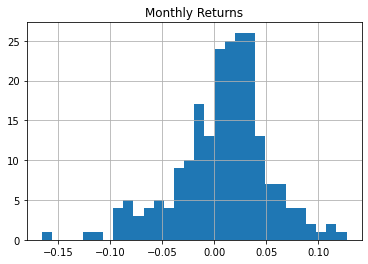

In [16]:
ax = monthly_ret.R.hist(bins=30)
ax.set_title("Monthly Returns")

In [17]:
monthly_ret.R.mean(), monthly_ret.R.quantile([0., 0.25, 0.5, 0.75, 1])

(0.008194895397956672,
 0.00   -0.165187
 0.25   -0.016224
 0.50    0.013372
 0.75    0.035097
 1.00    0.126983
 Name: R, dtype: float64)

In [18]:
# Expected return
(1+monthly_ret.R.mean()) **12 -1

0.10289439782923004

Visualizing univariate distributions

((array([-2.73069442, -2.42425735, -2.24987384, -2.12514902, -2.02671659,
         -1.94472048, -1.87403316, -1.81163199, -1.7555791 , -1.70455458,
         -1.65761721, -1.61407123, -1.57338714, -1.53515228, -1.49903847,
         -1.46478027, -1.43215977, -1.40099581, -1.37113604, -1.3424511 ,
         -1.31483013, -1.28817738, -1.26240956, -1.23745375, -1.21324569,
         -1.18972849, -1.16685149, -1.1445694 , -1.12284154, -1.10163124,
         -1.08090529, -1.06063354, -1.04078855, -1.02134519, -1.00228048,
         -0.98357327, -0.9652041 , -0.94715496, -0.92940923, -0.91195146,
         -0.8947673 , -0.87784338, -0.86116723, -0.8447272 , -0.82851237,
         -0.8125125 , -0.79671797, -0.78111975, -0.7657093 , -0.75047858,
         -0.73542001, -0.72052638, -0.70579089, -0.69120708, -0.67676883,
         -0.6624703 , -0.64830594, -0.63427049, -0.62035888, -0.60656631,
         -0.59288818, -0.57932009, -0.56585782, -0.55249733, -0.53923475,
         -0.52606634, -0.51298854, -0.

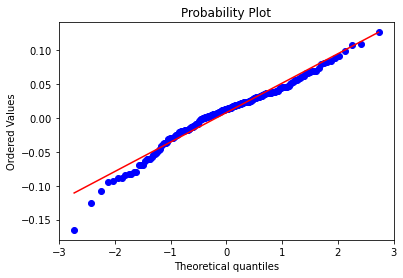

In [19]:
from scipy import stats
stats.probplot(monthly_ret.R, dist='norm', plot=plt)  # Q-Q plot

<AxesSubplot:>

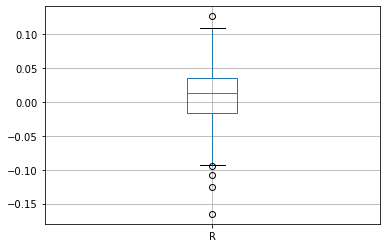

In [20]:
monthly_ret.R.quantile([0.25,0.5,0.75])
monthly_ret.boxplot('R')

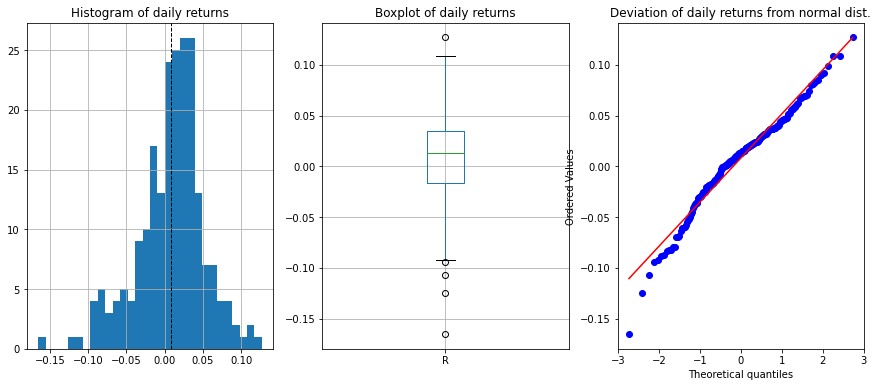

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
monthly_ret.R.hist(bins=30, ax=ax1)
ax1.axvline(monthly_ret.R.mean(), color='k', linestyle='dashed', linewidth=1)
ax1.set_title("Histogram of daily returns")

monthly_ret.boxplot('R', ax=ax2)
ax2.set_title("Boxplot of daily returns")

stats.probplot(monthly_ret.R, dist='norm', plot=ax3)
ax3.set_title("Deviation of daily returns from normal dist.")

fig.set_size_inches(15, 6)